### Visualization of 100 landmarks selected using Shapley value coefficients

**Reference Source:**

The 100 selected landmarks are based on the following research:

- **Author:** B. Latoszek
- **Title:** "Application of Machine Learning Methods for Automatic Lie Detection"
  - Polish: "Zastosowanie metod uczenia maszynowego do automatycznej detekcji kłamstwa"
- **Type:** Master's Thesis
- **Institution:** Warsaw University of Technology (Politechnika Warszawska)
- **Year:** 2025
- **Implementation:** [https://github.com/Newtoneiro/automatic-lie-detection](https://github.com/Newtoneiro/automatic-lie-detection)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
def visualize_specific_landmarks_2d(npy_data_path, npy_indices_path, width=1920, height=1080):
    try:
        sequence_np = np.load(npy_data_path).astype(np.float32)
        selected_indices = np.load(npy_indices_path).astype(int)

        frame_0 = sequence_np[0, :]
        N_points = len(frame_0) // 3
        points = frame_0.reshape(N_points, 3)

        X = points[selected_indices, 0]
        Y = points[selected_indices, 1]

        aspect_ratio = width / height
        X_scaled = X * aspect_ratio
        Y_scaled = Y

        center_x = (X_scaled.max() + X_scaled.min()) / 2
        center_y = (Y_scaled.max() + Y_scaled.min()) / 2

        dist_x = (X_scaled.max() - X_scaled.min()) / 2
        dist_y = (Y_scaled.max() - Y_scaled.min()) / 2
        dynamic_range = max(dist_x, dist_y) * 1.3

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.scatter(X_scaled, Y_scaled, c='dodgerblue', s=40, edgecolors='black', alpha=0.8)

        ax.set_aspect('equal', adjustable='box')

        ax.set_xlim(center_x - dynamic_range, center_x + dynamic_range)
        ax.set_ylim(center_y + dynamic_range, center_y - dynamic_range)

        ax.set_title(f"Widok {len(selected_indices)} punktów charakterystycznych", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.show()

    except Exception as e:
        print(f"Wystąpił błąd: {e}")

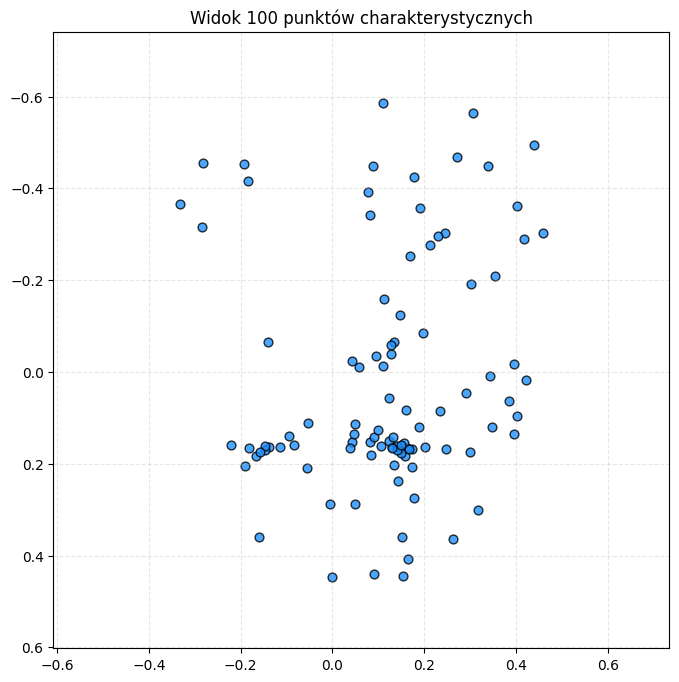

In [4]:
MY_INDICES = '/content/drive/MyDrive/PainRecognitionProject/data/top_100_important_landmarks_emotions.npy'

COLAB_ROOT = '/content/drive/MyDrive/PainRecognitionProject/'
RAVDESS_PROCESSED_DATA_DIR = os.path.join(COLAB_ROOT, 'data/RAVDESS_processed_478_xyz_frontalized/')
metadata_path = os.path.join(RAVDESS_PROCESSED_DATA_DIR, 'train_processed_metadata.csv')

df_meta = pd.read_csv(metadata_path)

example_row = df_meta[df_meta['label'] == 4].iloc[0]
npy_filename = os.path.basename(example_row['npy_path'])
example_npy_path = os.path.join(RAVDESS_PROCESSED_DATA_DIR, 'train', npy_filename)

visualize_specific_landmarks_2d(example_npy_path, MY_INDICES)